# <span style = "color : green;font-size:40px"> Graduate Admission Prediction </span>

***

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'admission_predict.csv' and store it in a DataFrame

In [2]:
df = pd.read_csv('admission_predict.csv')

### View the top 5 rows

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### View the bottom 5 rows

In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### Check info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### View the basic statistical information about the dataset

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Check for any null values

In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Note: Currently our target variable ranges form 0 to 1. We need to make this a classification problem. Create a new variable named 'Admission' which has values 0 and 1. If Chance of admin < 0.5, Admission = 0. If chance of admit > 0.5, Admission = 1

In [8]:
def zeroone(x):
    if x <= 0.5:
        return 0
    elif x > 0.5:
        return 1

In [9]:
df['Admission'] = df['Chance of Admit '].apply(zeroone)

In [10]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


### Drop Chance of Admit and Serial No. column

In [11]:
df.drop(columns = ['Chance of Admit ', 'Serial No.'], inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


## <span style = "color: orange"> Visualization </span>

### Plot a pairplot of the dataset

[]

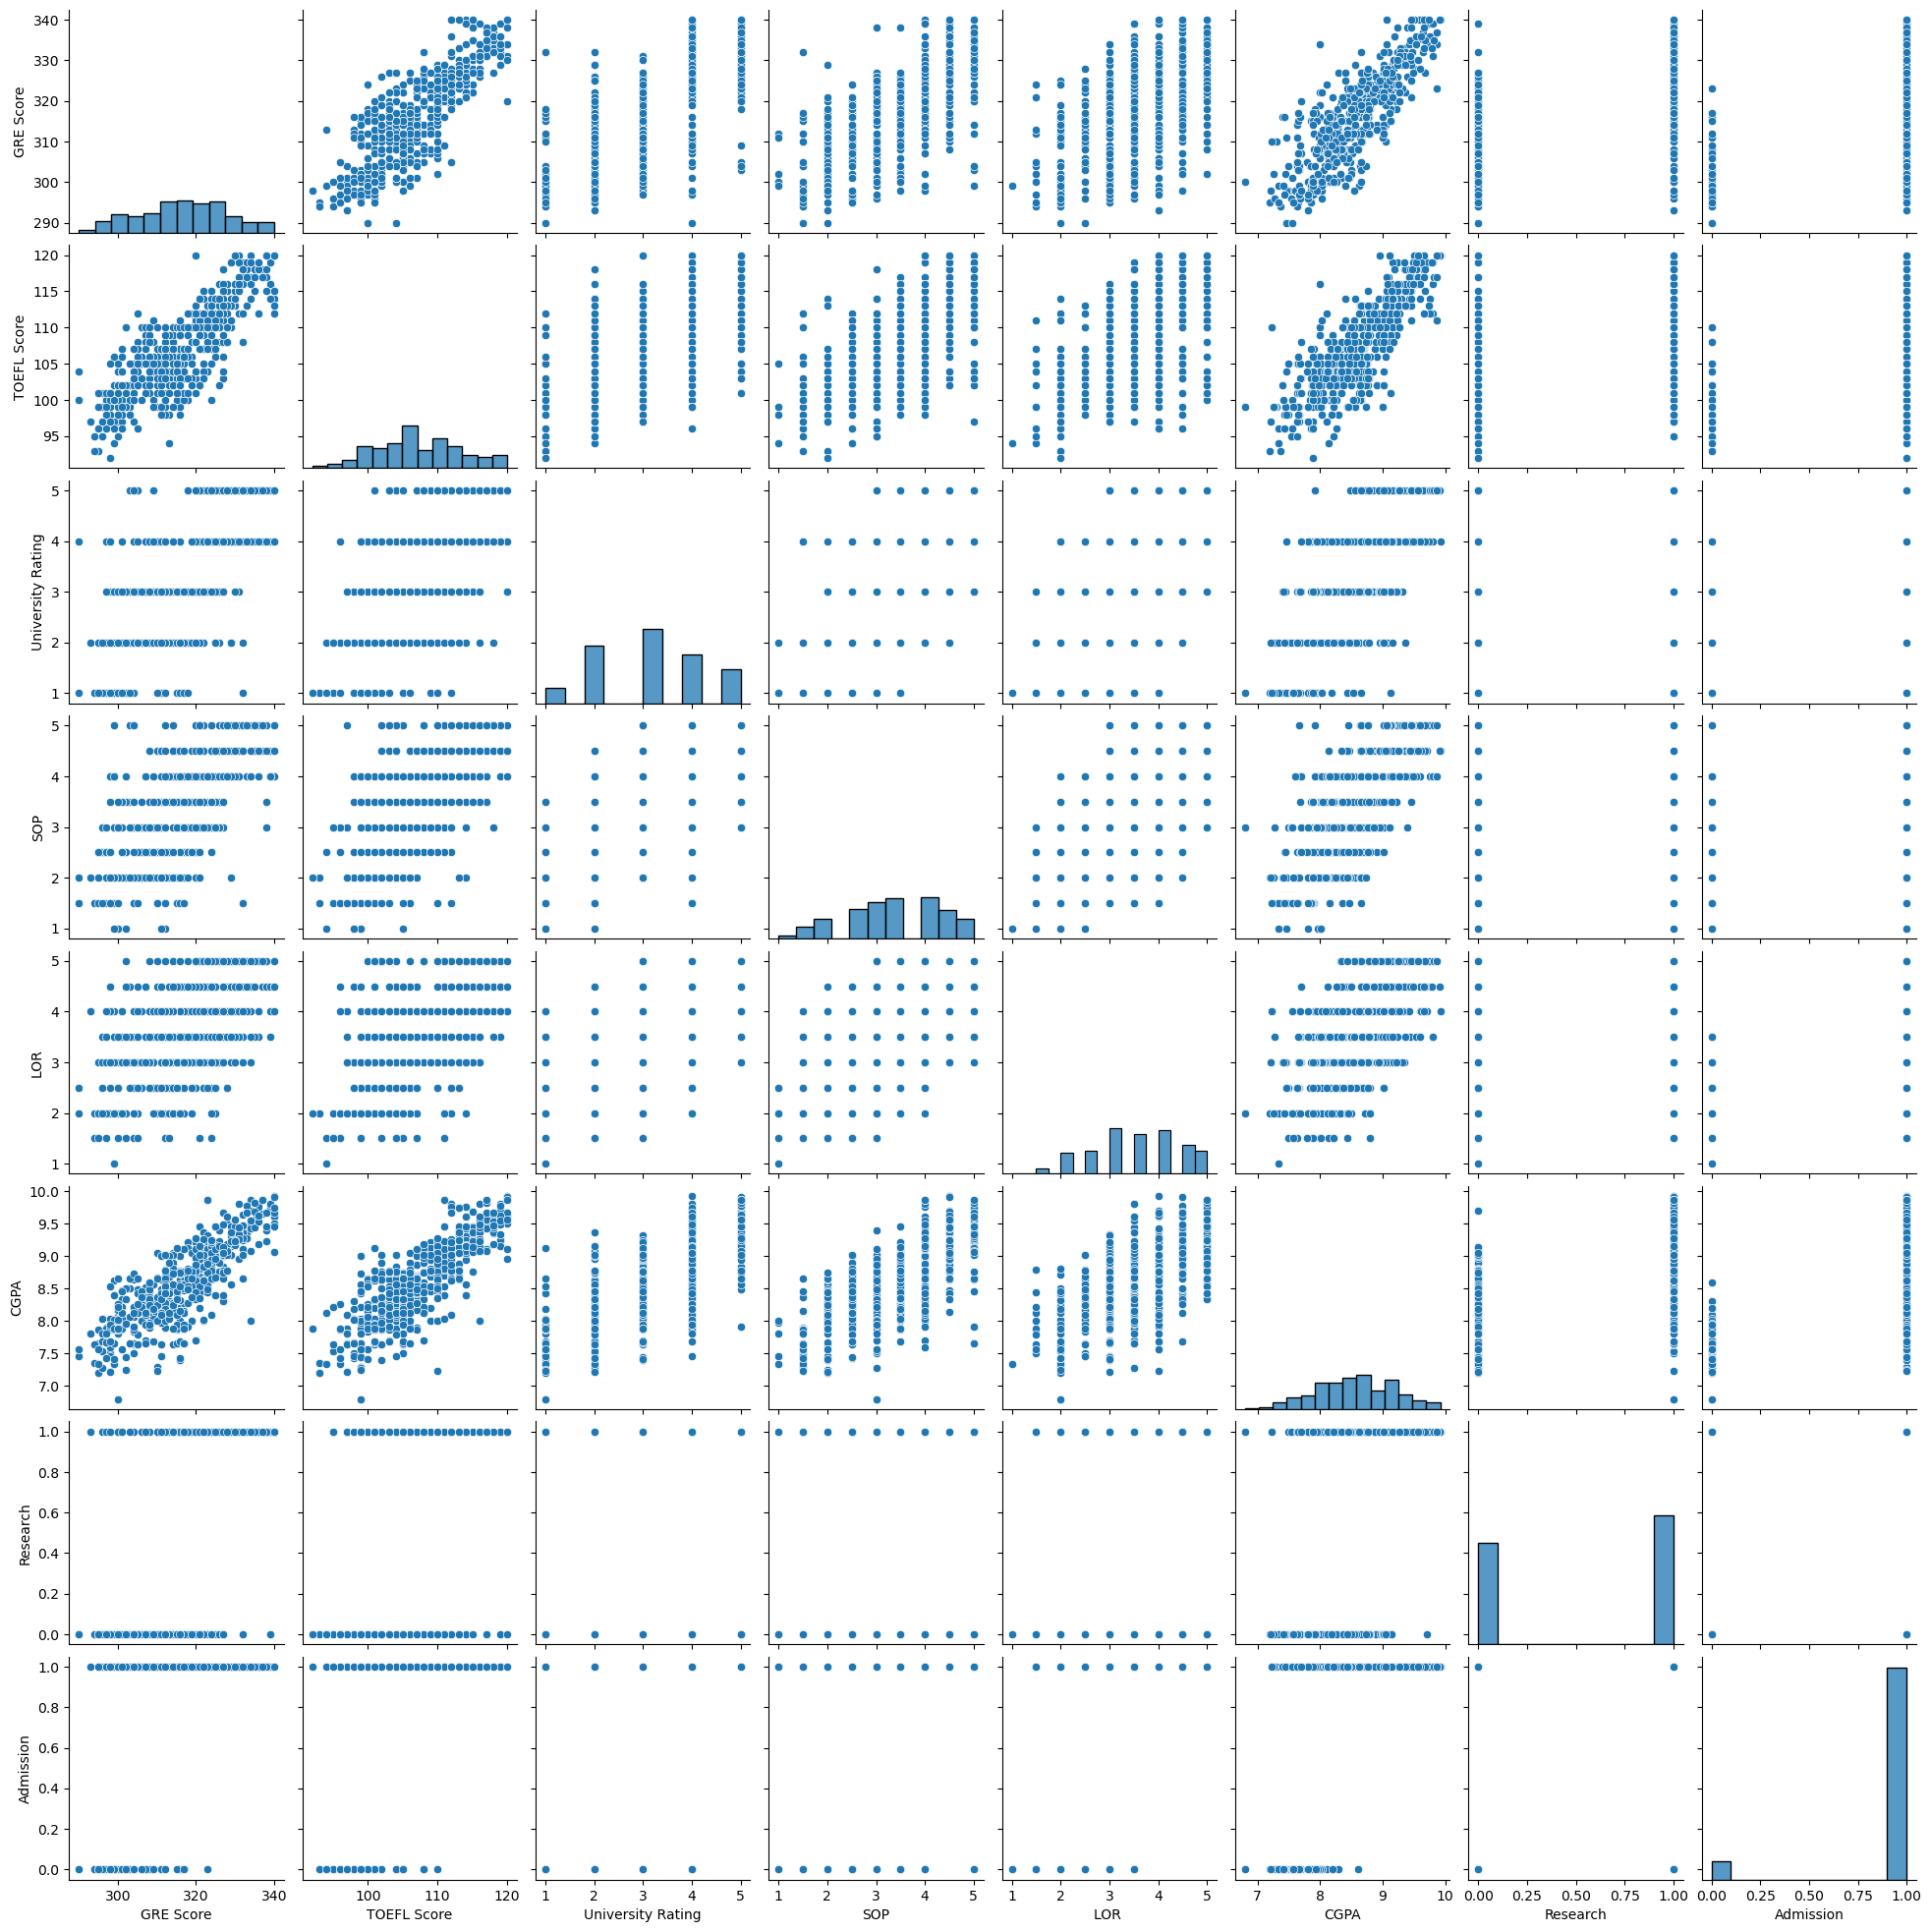

In [12]:
sns.pairplot(df)
plt.plot()

### Plot a heatmap to view correlation between the features

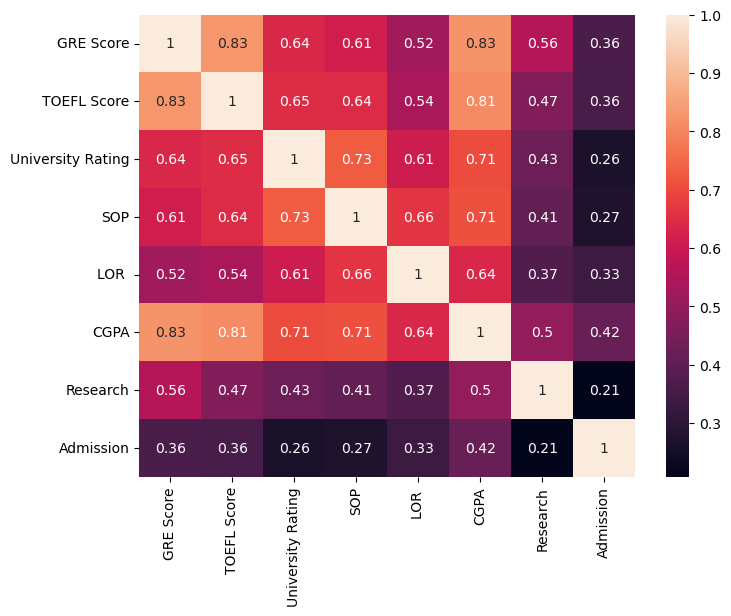

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Split the columns into Input and Target variables

In [14]:
X = df.drop(columns = ['Admission'])
y = df['Admission']

### Standardise the data using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
xcolumns = X.columns

In [18]:
X = scaler.fit_transform(X)

In [19]:
X = pd.DataFrame(X, columns = xcolumns)

In [20]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


### Split the dataset into Training and Testing setL

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

### Check the shape of X_train and X_test

In [23]:
X_train.shape

(400, 7)

In [24]:
X_test.shape

(100, 7)

### Create a Decision Tree model and Train it

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier()

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Check the score of our model

In [28]:
model.score(X_train, y_train)

1.0

### Make predictions with X_test

In [29]:
y_pred = model.predict(X_test)

### Check the accuracy of our model

In [30]:
from sklearn import metrics

In [31]:
metrics.accuracy_score(y_test, y_pred)

0.91

### Create confusion matrix

In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 3,  2],
       [ 7, 88]], dtype=int64)

### Plot confusion matrix on heatmap

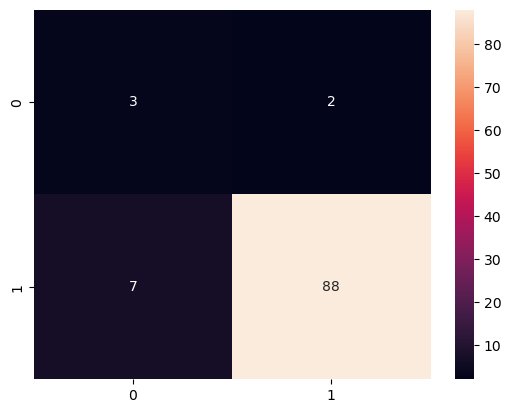

In [33]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### Create classification report

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.60      0.40         5
           1       0.98      0.93      0.95        95

    accuracy                           0.91       100
   macro avg       0.64      0.76      0.68       100
weighted avg       0.94      0.91      0.92       100



***